C:\Users\Jrans\AppData\Local\Temp\ipykernel_10328\252719161.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample("M").mean()


Data saved to 3month_treasury_rate.csv
        Date      Rate
0 1995-01-31  5.901500
1 1995-02-28  5.939474
2 1995-03-31  5.910435
3 1995-04-30  5.837895
4 1995-05-31  5.847727


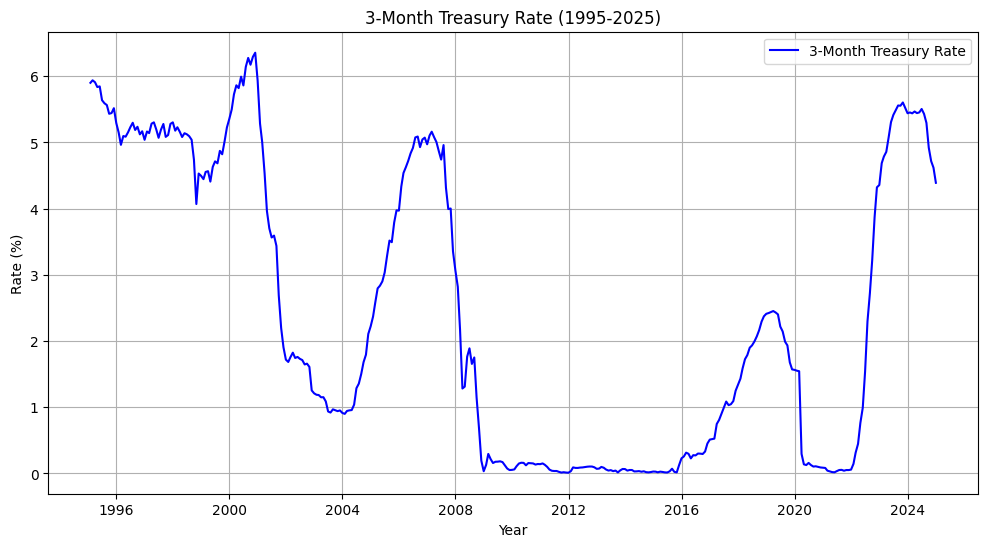

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime
import os

# Set your FRED API key
os.environ["FRED_API_KEY"] = "your_fred_api_key"

# Define the date range
start_date = "1995-01-01"
end_date = "2025-01-01"

# Fetch data from FRED
try:
    df = pdr.get_data_fred("DGS3MO", start=start_date, end=end_date)

    # Convert to monthly data
    df = df.resample("M").mean()

    # Rename columns
    df.reset_index(inplace=True)
    df.columns = ["Date", "Rate"]

    # Save to CSV
    csv_filename = "3month_treasury_rate.csv"
    df.to_csv(csv_filename, index=False)
    print(f"Data saved to {csv_filename}")

    # Display the first few rows
    print(df.head())

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(df["Date"], df["Rate"], label="3-Month Treasury Rate", color="blue")
    plt.xlabel("Year")
    plt.ylabel("Rate (%)")
    plt.title("3-Month Treasury Rate (1995-2025)")
    plt.legend()
    plt.grid()
    plt.show()

except Exception as e:
    print(f"Error fetching data: {e}")
